## SMIB

Synchronous Machine Infinite Bus (SMIB) system

### System building

In [2]:
from pydae.bmapu import bmapu_builder

#### System data

In [3]:
data = {
"system":{"name":"smib","S_base":100e6, "K_p_agc":0.0,"K_i_agc":0.0,"K_xif":0.01},       
"buses":[{"name":"1", "P_W":0.0,"Q_var":0.0,"U_kV":20.0},
         {"name":"2", "P_W":0.0,"Q_var":0.0,"U_kV":20.0}
        ],
"lines":[{"bus_j":"1", "bus_k":"2", "X_pu":0.05,"R_pu":0.01,"Bs_pu":1e-6,"S_mva":100.0}],
"syns":[
      {"bus":"1","S_n":100e6,
         "X_d":1.8,"X1d":0.3, "T1d0":8.0,    
         "X_q":1.7,"X1q":0.55,"T1q0":0.4,  
         "R_a":0.01,"X_l": 0.2, 
         "H":5.0,"D":1.0,
         "Omega_b":314.1592653589793,"omega_s":1.0,"K_sec":0.0,
         "avr":{"type":"kundur_tgr","K_a":200,"T_r":0.01,"E_fmin":-5,"E_fmax":10.0,"T_a":1,"T_b":10,"v_ref":1.03},
         "pss":{"type":"pss_kundur_2","K_stab":20, "T_1":0.05, "T_2":0.02, "T_3":3.0, "T_4":5.4, "T_w":10.0},      
         "gov":{"type":"tgov1","Droop":0.05,"T_1":1.0,"T_2":1.0,"T_3":1.0,"D_t":0.0,"K_sec":0.0,"p_c":0.8},
         "K_delta":0.0}],
"genapes":[{"bus":"2","S_n":1e9,"F_n":50.0,"X_v":0.001,"R_v":0.0,"K_delta":0.001,"K_alpha":1e-6}]
}

#### System generation and compilation

In [4]:
grid = bmapu_builder.bmapu(data)
grid.checker()
grid.uz_jacs = True
grid.verbose = False
grid.build('smib')

### System analysis and simulation

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pydae.ssa as ssa
from IPython.core.display import HTML,SVG
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

#### Initialization

In [6]:
import smib

In [7]:
model = smib.model()
model.ini({'p_c_1':1.0,'T_b_1':1.0},'xy_0.json')

True

In [8]:
model.report_x()
model.report_y()

delta_1 =  0.79
omega_1 =  1.00
e1q_1 =  1.05
e1d_1 =  0.48
v_r_1 =  1.03
x_ab_1 =  2.50
xi_v_1 = 12485.84
x_gov_1_1 =  1.00
x_gov_2_1 =  1.00
x_wo_pss_1 =  0.00
x_12_pss_1 =  0.00
x_34_pss_1 =  0.00
delta_2 =  0.00
Domega_2 =  0.00
Dv_2  =  0.00
xi_freq =  0.00
V_1   =  1.03
theta_1 =  0.04
V_2   =  1.00
theta_2 =  0.00
i_d_1 =  0.96
i_q_1 =  0.42
p_g_1 =  0.99
q_g_1 =  0.44
v_f_1 =  2.50
p_m_ref_1 =  1.00
p_m_1 =  1.00
v_pss_1 =  0.00
omega_2 =  1.00
i_d_2 = -0.04
i_q_2 = -0.10
p_s_2 = -0.10
q_s_2 = -0.04
omega_coi =  1.00
p_agc =  0.00


#### Small signal analysis

In [9]:
ssa.A_eval(model)
damp = ssa.damp_report(model)
damp.sort_values('Damp').round(2)

,Real,Imag,Freq.,Damp
Mode 6,-2.38,12.08,1.92,0.19
Mode 7,-2.38,-12.08,1.92,0.19
Mode 1,-1.00,0.00,0.00,1.00
Mode 2,-1.00,0.00,0.00,1.00
Mode 3,-0.01,0.00,0.00,1.00
Mode 4,-96.92,0.00,0.00,1.00
Mode 5,-47.92,0.00,0.00,1.00
Mode 8,-7.07,0.00,0.00,1.00
Mode 9,-1.47,0.00,0.00,1.00
Mode 10,-0.91,0.00,0.00,1.00


#### Time domain simulation

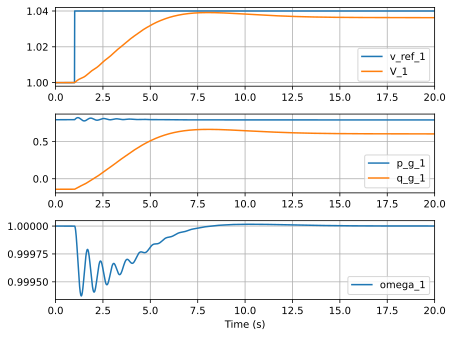

In [10]:
model = smib.model()
model.Dt = 0.01
model.decimation = 1
model.ini({'v_ref_1':1.0, 'K_a_1':200.0},'xy_0.json')
model.run( 1.0,{})
model.run(30.0,{'v_ref_1':1.04})
model.post();

fig,axes = plt.subplots(nrows=3)

axes[0].plot(model.Time,  model.get_values('v_ref_1'),label='v_ref_1')
axes[0].plot(model.Time,  model.get_values('V_1'),label='V_1')

axes[1].plot(model.Time,  model.get_values('p_g_1'),label='p_g_1')
axes[1].plot(model.Time,  model.get_values('q_g_1'),label='q_g_1')

axes[2].plot(model.Time,  model.get_values('omega_1'),label='omega_1')

for ax in axes:
    ax.legend()
    ax.grid()
    ax.set_xlim([0,20])
ax.set_xlabel('Time (s)')
fig.tight_layout()

In [11]:
model.report_params()

S_base =100000000.00
g_1_2 = 3.85
b_1_2 =-19.23
bs_1_2 =-0.00
U_1_n =20000.00
U_2_n =20000.00
S_n_1 =100000000.00
Omega_b_1 =314.16
H_1   = 5.00
T1d0_1 = 8.00
T1q0_1 = 0.40
X_d_1 = 1.80
X_q_1 = 1.70
X1d_1 = 0.30
X1q_1 = 0.55
D_1   = 1.00
R_a_1 = 0.01
K_delta_1 = 0.00
K_sec_1 = 0.00
K_a_1 =200.00
K_ai_1 = 0.00
T_r_1 = 0.01
T_a_1 = 1.00
T_b_1 =10.00
Droop_1 = 0.05
T_gov_1_1 = 1.00
T_gov_2_1 = 1.00
T_gov_3_1 = 1.00
D_t_1 = 0.00
omega_ref_1 = 1.00
T_wo_pss_1 =10.00
T_1_pss_1 = 0.05
T_2_pss_1 = 0.02
T_3_pss_1 = 3.00
T_4_pss_1 = 5.40
K_stab_1 =20.00
V_lim_pss_1 = 0.10
S_n_2 =1000000000.00
F_n_2 =50.00
X_v_2 = 0.00
R_v_2 = 0.00
K_delta_2 = 0.00
K_alpha_2 = 0.00
K_rocov_2 = 0.00
K_p_agc = 0.00
K_i_agc = 0.00
K_xif = 0.01
